In [1]:
import numpy as np 
import random
import pandas as pd
from keras import optimizers
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error


In [2]:
dataF5 = pd.read_excel('Book5.xlsx')

In [3]:
dataF5_states=dataF5[['phase','student_level']]
dataF5_states

,phase,student_level
0,1,3
1,1,3
2,1,3
3,1,2
4,1,4
...,...,...
9995,5,2
9996,5,1
9997,5,1
9998,5,1


In [4]:
dataF5_without_task_variant=dataF5[['p1','k1','s1','t1','a1','p2','k2','s2','t2','a2','p3','k3','s3','t3','a3','p4','k4','s4','t4','a4','p5','k5','s5','t5','a5'
]]
dataF5_without_task_variant


,p1,k1,s1,t1,a1,p2,k2,s2,t2,a2,...,p4,k4,s4,t4,a4,p5,k5,s5,t5,a5
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,1,1,1,1,0,1,1,0,...,1,1,0,1,0,1,1,1,1,1
9996,1,1,0,0,1,0,1,0,0,0,...,0,1,0,1,1,1,1,0,1,0
9997,1,1,0,1,0,0,1,1,0,1,...,1,1,1,0,1,1,1,1,1,1
9998,1,1,1,0,1,1,1,1,1,0,...,0,1,1,1,0,1,1,0,1,0


In [5]:
dataF5_with_task_variant=dataF5[['task_variant']]
dataF5_with_task_variant

,task_variant
0,1
1,1
2,1
3,3
4,1
...,...
9995,1
9996,3
9997,2
9998,1


In [6]:

X_train,X_test,Y_train,Y_test=train_test_split(dataF5_without_task_variant,dataF5_with_task_variant,test_size=0.2,random_state=0)

print(f'len(X_train)=\n{len(X_train)}\nlen(X_test)=\n{len(X_test)}\nlen(Y_train)=\n{len(Y_train)}\nlen(Y_test)=\n{len(Y_test)}\n')
print('-------------------------------')
print(f'X_train=\n{X_train}\n\nX_test=\n{X_test}\n\nY_train=\n{Y_train}\n\nY_test=\n{Y_test}\n')

len(X_train)=
8000
len(X_test)=
2000
len(Y_train)=
8000
len(Y_test)=
2000

-------------------------------
X_train=
      p1  k1  s1  t1  a1  p2  k2  s2  t2  a2  ...  p4  k4  s4  t4  a4  p5  k5  \
7389   1   1   1   1   0   1   1   0   1   1  ...   1   0   1   0   1   0   0   
9275   1   1   1   1   1   1   0   1   1   1  ...   1   1   1   1   1   0   1   
2995   1   1   1   1   1   1   0   1   1   1  ...   0   0   0   0   0   0   0   
5316   1   1   1   1   1   0   1   1   1   1  ...   0   0   0   0   0   0   0   
356    1   1   1   1   1   0   0   0   0   0  ...   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
9225   1   0   1   1   1   1   1   1   1   0  ...   0   1   0   1   0   1   1   
4859   1   0   1   1   0   1   0   1   1   1  ...   0   0   0   0   0   0   0   
3264   1   1   1   1   1   1   0   0   1   1  ...   0   0   0   0   0   0   0   
9845   0   0   1   1   1   0   1   0   0   1  ...   0   0   1   1   1   1 

In [7]:
# DecisionTreeClassifier

tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)
y_prediction_DT=tree.predict(X_test)

print(f'y_prediction = {y_prediction_DT}\nY_test =       {Y_test}')

y_prediction = [2 1 3 ... 1 1 2]
Y_test =             task_variant
9394             2
898              1
2398             3
5906             1
2343             1
...            ...
1037             1
2899             1
9549             1
2740             1
6690             2

[2000 rows x 1 columns]


In [8]:
# Evaluation DecisionTreeClassifier

y_prediction=tree.predict(X_test)

accuracy = accuracy_score(Y_test, y_prediction)
precision = precision_score(Y_test, y_prediction, average='weighted')
recall = recall_score(Y_test, y_prediction, average='weighted')  
f1 = f1_score(Y_test, y_prediction, average='weighted') 
mea_DT=mean_squared_error(Y_test,y_prediction)
conf_matrix = confusion_matrix(Y_test, y_prediction)
class_report = classification_report(Y_test, y_prediction)


print(f'y_prediction = {y_prediction}\ny_test = {Y_test}')
print(f'-------------------------------------------------')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'mean_squared_error = {mea_DT}')
print(f'-------------------------------------------------')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')





y_prediction = [2 1 3 ... 1 1 2]
y_test =       task_variant
9394             2
898              1
2398             3
5906             1
2343             1
...            ...
1037             1
2899             1
9549             1
2740             1
6690             2

[2000 rows x 1 columns]
-------------------------------------------------
Accuracy: 92.85%
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
mean_squared_error = 0.0745
-------------------------------------------------
Confusion Matrix:
[[931  54   2]
 [ 52 529  17]
 [  0  18 397]]
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.94      0.95       987
           2       0.88      0.88      0.88       598
           3       0.95      0.96      0.96       415

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



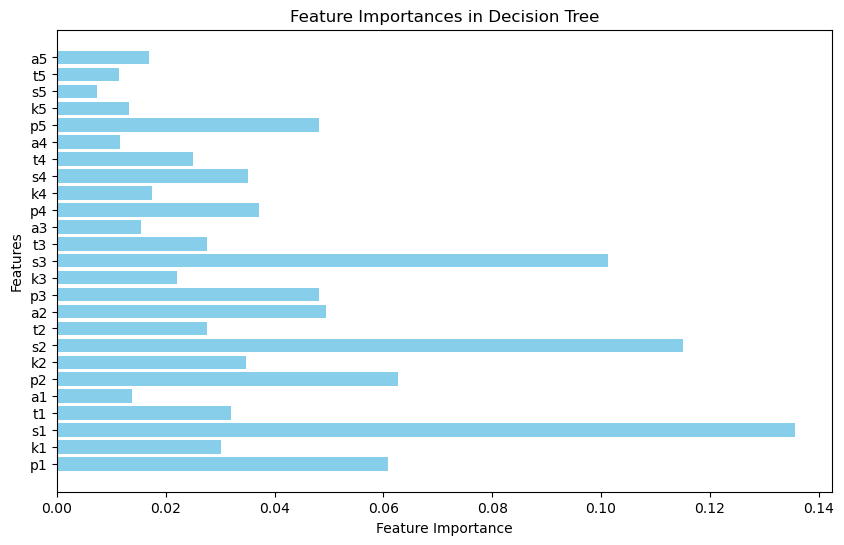

In [9]:
# استخراج ویژگی‌های مهم
importances = tree.feature_importances_
features = X_train.columns

# رسم نمودار ویژگی‌های مهم
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Decision Tree')
plt.show()


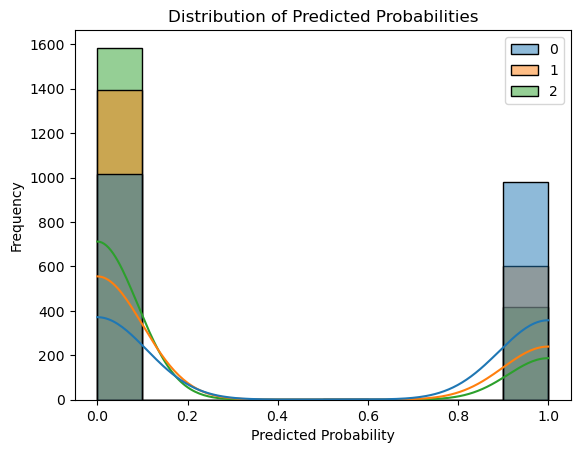

In [16]:
#  نمودار توزیع پیش‌بینی‌ها
y_prob = tree.predict_proba(X_test)
# y_prob = tree.predict_proba(X_test)[:, 2]
sns.histplot(y_prob, bins=10, kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()
